In [2]:
import uproot
import uproot_methods
import awkward
import matplotlib.pyplot as plt
import numpy as np

In [9]:
G3 = uproot.open("/home/physicist/results/zjets_pt170.root")["T"]

g3 = G3.arrays(['gen_pt', 'gen_eta', 'gen_phi', 'gen_m', 
               'gen_id', 'gen_status', 
               'gen_mother1', 'gen_mother2', 
               'gen_daughter1', 'gen_daughter2', 
               'gen_col', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_m', 'nJet', 'jet_ic', 'jet_nc'])

gen_pt = g3[b'gen_pt']
gen_eta = g3[b'gen_eta']
gen_phi = g3[b'gen_phi']
gen_m = g3[b'gen_m']

gen_id = g3[b'gen_id']
gen_status = g3[b'gen_status']

##### Jets
jet_pt = g3[b'jet_pt']
jet_eta = g3[b'jet_eta']
jet_phi = g3[b'jet_phi']
jet_m = g3[b'jet_m']
jet_ic = g3[b'jet_ic']
jet_nc = g3[b'jet_nc']
nJet = g3[b'nJet']

In [10]:
particles = uproot_methods.TLorentzVectorArray.from_ptetaphim(gen_pt, gen_eta, gen_phi, gen_m)

In [11]:
jet3 = uproot_methods.TLorentzVectorArray.from_ptetaphim(jet_pt, jet_eta, jet_phi, jet_m)

In [12]:
isz = abs(gen_id) == 23
ishard = abs(gen_status) == 62
selected = isz & ishard
zbosons = particles[ selected ]

In [15]:
jets_pt = jet3.pt
jet_imaxpt = jets_pt.argmax()
leadingjets = jet3[jet_imaxpt]

In [17]:
print(len(leadingjets) , " -----", len(zbosons))

2574  ----- 2574


In [18]:
zjets_plot = leadingjets.cross(zbosons)

In [19]:
sum = zjets_plot.i0 + zjets_plot.i1

In [20]:
arr = []
f = 0

for i in range(81):
    arr.append(f)
    f += 50

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.39860140e-04, 1.86480186e-03, 3.04584305e-03, 2.63403263e-03,
        2.27661228e-03, 1.70940171e-03, 1.67055167e-03, 1.11888112e-03,
        1.08780109e-03, 8.78010878e-04, 6.52680653e-04, 5.36130536e-04,
        4.11810412e-04, 2.95260295e-04, 2.87490287e-04, 2.40870241e-04,
        1.55400155e-04, 1.47630148e-04, 1.24320124e-04, 7.77000777e-05,
        6.21600622e-05, 6.99300699e-05, 7.77000777e-05, 3.88500389e-05,
        4.66200466e-05, 3.88500389e-05, 2.33100233e-05, 3.10800311e-05,
        4.66200466e-05, 1.55400155e-05, 1.55400155e-05, 2.33100233e-05,
        2.33100233e-05, 1.55400155e-05, 1.55400155e-05, 3.88500389e-05,
        7.77000777e-06, 7.77000777e-06, 1.55400155e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.77000777e-06, 7.77000777e-06, 0.00000000e+00, 0.000000

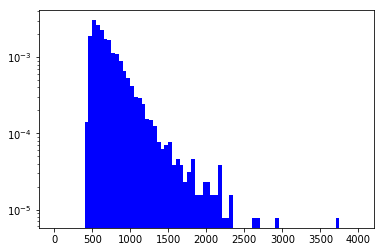

In [24]:
plt.hist(x= sum.mass.flatten(), bins=arr, log=True, density=True, color = "blue")